In [548]:
import scipy.io 
import numpy as np 
import matplotlib.pyplot as plt 
import copy

path = '../datasets/ex3data1.mat'
mat = scipy.io.loadmat(path)
X = mat['X'] # 5000 * 400
y = mat['y'] # 5000 * 1
print(X.shape)

(5000, 400)


In [549]:
index = np.where(y==10)[0]
y[index] = 0

In [550]:
ids = np.random.permutation(range(X.shape[0]))
num_train = 4500
X_train = X[ids[:num_train]]
y_train = y[ids[:num_train]]
X_test = X[ids[num_train:]]
y_test = y[ids[num_train:]]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# X_train

(4500, 400)
(4500, 1)
(500, 400)
(500, 1)


In [551]:
# x = (x-x_mean)/(x_max-x_min)
# mean=0
x_mean = np.mean(X_train, axis=0)
def normalize(x):
    x = (x-x_mean) / 255
    return x

    

In [552]:
# add ones
def addones(x):
    ones = np.ones((x.shape[0], 1))
    x_new = np.concatenate((ones, x), axis=1)
    return x_new

/home/phuongnam/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


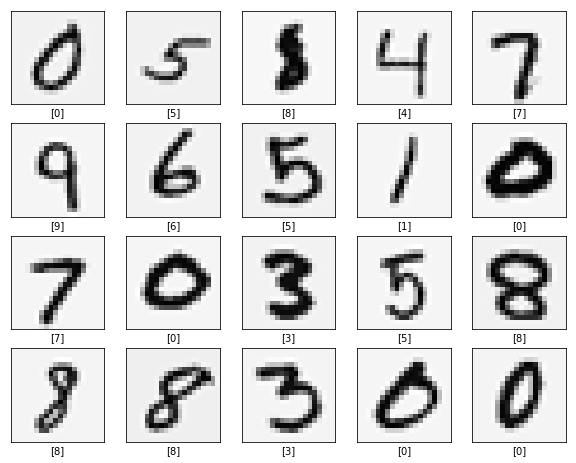

In [553]:
# %matplotlib inline
# Visualize data
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_train[i].reshape(20, 20).T, cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
#     plt.show()
    

In [554]:
# normalize data (only in train data)
X_train = normalize(X_train)
X_train = addones(X_train)
X_train.shape

(4500, 401)

In [555]:
K = 10 #num class

In [556]:
# cac ham thuat toan
def h(theta, x):
    return 1 / (1+np.exp(-np.dot(x, theta)))
def grad(theta, x, y):
    return np.dot(x.T, h(theta, x)-y) / x.shape[0]
def GD(theta_init, x, y, lr, ite):
    theta = theta_init
    for it in range(ite):
        theta -= lr*grad(theta, x, y)
    return theta

In [557]:
# khoi tao gia tri
theta_init = np.zeros((X_train.shape[1],1))
lr = .01
ite = 1000

In [558]:
# normalize test data 
X_test = normalize(X_test)
X_test = addones(X_test)
# print(X_test.mean())

In [559]:
y_pred = np.zeros((y_test.shape[0], 1))
for k in range(K):
#     X_train_, y_train_, X_test_, y_test_ = X_train, y_train, X_test, y_test
    print('############################')
    print(k)
    X_train_ = copy.deepcopy(X_train)
    y_train_ = copy.deepcopy(y_train)
    X_test_ = copy.deepcopy(X_test)
    y_test_ = copy.deepcopy(y_test)
    ind = np.where(y_train_ == k)[0]
    print(ind)
    y_train_[ind] = 1
    for i in range(y_train_.shape[0]):
        if i not in ind:
            y_train_[i] = 0
#     print(X_train_)
#     print(y_train_)
#     print(y_train_[6])
    print(theta_init)
    print(lr)
    print(ite)
    theta_op = GD(theta_init, X_train_, y_train_, lr, ite)
    
#     ind_ = np.where(y_test_ == k)[0]
#     y_test_[ind_] = 1
#     for i in range(y_test_.shape[0]):
#         if i not in ind_:
#             y_test_[i] = 0
    print(theta_op.mean())        
    pred = h(theta_op, X_test_)
#     print(pred)
#     pred = (np.sign(h(theta_op, X_test_) - 0.5) + 1) / 2
#     print(pred)
    y_pred = np.hstack((y_pred, pred))
    if k==2:
        break

############################
0
[   0    9   11   18   19   20   66   85   97  113  122  126  128  129
  135  147  150  153  161  189  196  198  201  211  234  258  290  292
  320  325  341  345  363  382  398  403  410  418  421  426  431  434
  447  481  483  487  499  505  508  512  518  526  545  547  554  555
  577  579  584  597  599  610  611  621  666  667  671  683  707  712
  713  739  747  759  760  762  773  780  790  793  797  810  812  817
  820  839  840  845  881  882  891  894  901  902  917  925  929  938
  940  943  944  982  984  986 1002 1003 1005 1031 1032 1040 1051 1055
 1058 1064 1079 1081 1096 1103 1106 1108 1123 1126 1136 1147 1155 1164
 1185 1201 1203 1207 1218 1235 1238 1239 1241 1252 1253 1261 1263 1266
 1272 1300 1304 1321 1334 1348 1352 1382 1385 1387 1393 1422 1430 1458
 1464 1466 1468 1480 1492 1523 1531 1547 1558 1566 1585 1586 1589 1590
 1599 1602 1611 1617 1619 1622 1624 1633 1637 1638 1649 1675 1678 1681
 1683 1692 1701 1707 1723 1737 1741 1751 1752 

-0.005023488851506102
############################
2
[  26   41   60   67   69   89  102  104  107  109  134  136  138  141
  148  152  155  160  162  178  181  187  195  206  217  227  232  240
  249  252  254  261  285  298  301  308  318  319  331  336  346  367
  378  387  393  405  408  419  470  476  482  484  491  494  506  592
  593  598  603  608  625  640  651  663  677  685  694  709  710  715
  754  764  776  777  804  822  851  859  865  870  873  887  889  898
  911  951  954  961  972  987  992 1008 1022 1044 1045 1052 1065 1066
 1076 1085 1100 1102 1110 1114 1118 1135 1151 1175 1177 1178 1180 1182
 1195 1222 1227 1246 1249 1256 1268 1279 1284 1302 1309 1312 1315 1332
 1333 1340 1341 1360 1366 1398 1400 1409 1410 1433 1438 1448 1463 1475
 1483 1489 1494 1498 1503 1511 1514 1515 1516 1517 1518 1526 1542 1560
 1565 1578 1580 1587 1594 1603 1616 1666 1670 1686 1689 1691 1697 1716
 1720 1730 1764 1775 1777 1787 1789 1816 1820 1845 1848 1849 1864 1868
 1871 1880 1881 1887 189

-0.005265417468709685


In [560]:
print(y_pred)
# print((np.sum(y_pred, axis=1)))

[[0.         0.16373053 0.11906501 0.10677777]
 [0.         0.16374057 0.1190601  0.10677397]
 [0.         0.16374344 0.1190634  0.10677396]
 ...
 [0.         0.1637418  0.11906599 0.10677952]
 [0.         0.16376275 0.11907512 0.10679158]
 [0.         0.16374763 0.11905944 0.10676967]]


In [561]:
ind = np.where(y_train == 0)[0]
# x_train = X_train[ind, :][0]
# x_train.shape
# print(ind)
y_train[ind] = 1
for i in range(y_train.shape[0]):
    if i not in ind:
        y_train[i] = 0
    
# [y_train[i] = 0 for i in range((y_train.shape[0])) if i not in ind]
y_train.shape

(4500, 1)

In [562]:
ind = np.where(y_test == 0)[0]
# x_train = X_train[ind, :][0]
# x_train.shape
# print(ind)
y_test[ind] = 1
for i in range(y_test.shape[0]):
    if i not in ind:
        y_test[i] = 0
    

In [568]:
theta_op = GD(theta_init, X_train, y_train, lr, ite)
pred = (np.sign(h(theta_op, X_test) - 0.5) + 1) / 2
print(pred)
print(np.mean(pred == y_test))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [567]:
h(theta_op, X_test).shape

(500, 1)